In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [3]:
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")

df = pd.read_csv(filename, header = 0)

In [4]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [5]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [6]:
df.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
year,1.000000,-0.014505,0.051140,-0.052845,0.100904,0.134332,-0.014111,-0.051141,-0.024730,0.171805,-0.018925,-0.017400,-0.011016,0.273838,0.209680,-0.053342,-0.026927,0.071773
Life Ladder,-0.014505,1.000000,0.779476,0.700299,0.729852,0.526058,0.204910,-0.425013,0.554462,-0.267492,-0.085543,0.607034,0.706673,-0.154257,-0.756076,-0.097255,-0.172745,-0.294080
Log GDP per capita,0.051140,0.779476,1.000000,0.658591,0.841612,0.362998,-0.000334,-0.350142,0.311868,-0.120597,-0.162000,0.630107,0.770370,-0.086494,-0.566376,-0.342142,-0.314639,-0.355850
Social support,-0.052845,0.700299,0.658591,1.000000,0.586759,0.418213,0.077543,-0.217857,0.459656,-0.352552,-0.160353,0.536387,0.545010,-0.174091,-0.594465,-0.148387,-0.128284,-0.314072
Healthy life expectancy at birth,0.100904,0.729852,0.841612,0.586759,1.000000,0.340026,0.047079,-0.311037,0.297759,-0.105255,-0.188827,0.597106,0.721081,-0.065870,-0.526026,-0.306798,-0.364279,-0.422890
Freedom to make life choices,0.134332,0.526058,0.362998,0.418213,0.340026,1.000000,0.357158,-0.496932,0.615916,-0.284391,0.408096,0.445323,0.486678,-0.081104,-0.369111,0.044033,0.057697,0.108313
Generosity,-0.014111,0.204910,-0.000334,0.077543,0.047079,0.357158,1.000000,-0.305019,0.380896,-0.117508,0.275648,0.118966,0.203871,-0.182119,-0.193145,-0.016602,-0.043810,0.194036
Perceptions of corruption,-0.051141,-0.425013,-0.350142,-0.217857,-0.311037,-0.496932,-0.305019,1.000000,-0.302946,0.267359,-0.436614,-0.322063,-0.514183,0.301730,0.378509,0.158565,0.170775,-0.043064
Positive affect,-0.024730,0.554462,0.311868,0.459656,0.297759,0.615916,0.380896,-0.302946,1.000000,-0.384112,0.144219,0.369666,0.365544,-0.069609,-0.410061,0.371113,0.298045,0.121792
Negative affect,0.171805,-0.267492,-0.120597,-0.352552,-0.105255,-0.284391,-0.117508,0.267359,-0.384112,1.000000,-0.159316,-0.198636,-0.211019,0.510342,0.520042,0.171791,0.074559,0.148413


In [7]:
corrs = df.corr()['Life Ladder']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

Life Ladder                                                 1.000000
Log GDP per capita                                          0.779476
Healthy life expectancy at birth                            0.729852
Delivery Quality                                            0.706673
Social support                                              0.700299
Democratic Quality                                          0.607034
Positive affect                                             0.554462
Freedom to make life choices                                0.526058
Generosity                                                  0.204910
year                                                       -0.014505
Confidence in national government                          -0.085543
GINI index (World Bank estimate)                           -0.097255
Standard deviation of ladder by country-year               -0.154257
GINI index (World Bank estimate), average 2000-15          -0.172745
Negative affect                   

In [8]:
nan_cols = (nan_count != 0).index
nan_countries = set()

for col in nan_cols:
    tmp = df.loc[df[col].isnull()]
    countries = set(tmp['country'])
    
    for country in countries:
        mean = df.loc[df['country'] == country, col].mean()
        if not np.isnan(mean):
            df.loc[(df['country'] == country) & (df[col].isna()), col] = mean
        else:
            nan_countries.add(country)
            
nan_countries

{'Afghanistan',
 'Algeria',
 'Angola',
 'Bahrain',
 'Belize',
 'Bhutan',
 'Botswana',
 'Burundi',
 'Cambodia',
 'Central African Republic',
 'China',
 'Comoros',
 'Cuba',
 'Djibouti',
 'Ethiopia',
 'Gabon',
 'Guyana',
 'Hong Kong S.A.R. of China',
 'Jamaica',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malawi',
 'Malta',
 'Mauritius',
 'Morocco',
 'Namibia',
 'New Zealand',
 'North Cyprus',
 'Oman',
 'Palestinian Territories',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Somalia',
 'Somaliland region',
 'South Sudan',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Syria',
 'Taiwan Province of China',
 'Trinidad and Tobago',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan'}

In [9]:
for country in nan_countries:
    df = df[df['country'].isin(nan_countries) == False]
    
np.sum(df.isnull(), axis = 0)

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

In [10]:
df = (df - df.mean())/df.std()

In [11]:
features_to_drop = ['country', 
                    'Life Ladder',
                    'year',
                    'Standard deviation of ladder by country-year',
                    'Standard deviation/Mean of ladder by country-year',
                    'Negative affect',
                    'GINI index (World Bank estimate)',
                    'Democratic Quality']

X = df.drop(columns = features_to_drop, axis = 1)
y = df['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
i = 0
weights = dict()

for col in X.columns:
    weights[col] = model.coef_[i]
    i += 1

weights

{'Confidence in national government': -0.09253716481405178,
 'Delivery Quality': 0.022831576497784604,
 'Freedom to make life choices': 0.10945934947582284,
 'GINI index (World Bank estimate), average 2000-15': 0.08116696567000313,
 'Generosity': 0.09129479091436289,
 'Healthy life expectancy at birth': 0.15774826400562367,
 'Log GDP per capita': 0.3498762248791546,
 'Perceptions of corruption': -0.16252981705725833,
 'Positive affect': 0.15120338818968784,
 'Social support': 0.1822245397917696,
 'gini of household income reported in Gallup, by wp5-year': -0.06981714713862439}

In [14]:
print('\nModel Performance\n\nRMSE =   %.5f'
      % np.sqrt(mean_squared_error(y_test, predictions)))
print(' R^2 =   %.5f'
      % r2_score(y_test, predictions))

rmse_lr = np.sqrt(mean_squared_error(y_test, predictions))
r2_lr = r2_score(y_test, predictions)


Model Performance

RMSE =   0.44260
 R^2 =   0.80805


In [15]:
print(X_train.shape)
print(X_test.shape)

(1000, 11)
(250, 11)


In [16]:
nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(11,), name='input')

nn_model.add(input_layer)

hidden_layer_1 = keras.layers.Dense(units=128, activation='relu', name='hl_1')

nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.25))

hidden_layer_2 = keras.layers.Dense(units=64, activation='relu', name='hl_2')

nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.25))

hidden_layer_3 = keras.layers.Dense(units=32, activation='relu', name='hl_3')

nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.25))

hidden_layer_4 = keras.layers.Dense(units=16, activation='relu', name='hl_4')

nn_model.add(hidden_layer_4)
nn_model.add(keras.layers.Dropout(.25))

output_layer = keras.layers.Dense(units=1, activation='sigmoid', name='output')

nn_model.add(output_layer)

In [17]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [18]:
loss_fn = keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

In [19]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['mse'])

In [20]:
num_epochs = 50 # number of epochs

history = nn_model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    verbose=0
)

In [21]:
loss, mse = nn_model.evaluate(X_test, y_test, verbose=0)

rmse_nn = np.sqrt(mse)

In [22]:
estimators = [("DT", DecisionTreeRegressor(max_depth = 2)),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor(n_estimators = 300)),
              ("LR", LinearRegression())
             ]

stacking_model = StackingRegressor(estimators = estimators, cv = 5, passthrough = False)

In [23]:
'''
params = {
    "DT__max_depth": [2, 4, 6, 8],
    "GBDT__n_estimators":[50, 100, 200, 300]
    
}

stack_grid = GridSearchCV(stacking_model, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
stack_grid.fit(X_train, y_train)
print(stack_grid.best_params_)
stack_grid.cv_results_['mean_test_score']


print("best parameters:", stack_grid.best_params_)

rmse_stack_cv = -1*stack_grid.best_score_
print("[STACK] RMSE for the best model is : {:.2f}".format(rmse_stack_cv))
'''

'''
Results:
{'DT__max_depth': 2, 'GBDT__n_estimators': 300}
best parameters: {'DT__max_depth': 2, 'GBDT__n_estimators': 300}
[STACK] RMSE for the best model is : 0.35
'''

"\nResults:\n{'DT__max_depth': 2, 'GBDT__n_estimators': 300}\nbest parameters: {'DT__max_depth': 2, 'GBDT__n_estimators': 300}\n[STACK] RMSE for the best model is : 0.35\n"

In [24]:
stacking_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('DT',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=2,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=None,
                                                     s

In [25]:
stacking_pred = stacking_model.predict(X_test)

rmse_stack = mean_squared_error(y_test, stacking_pred, squared = False)
r2_stack = r2_score(y_test, stacking_pred)

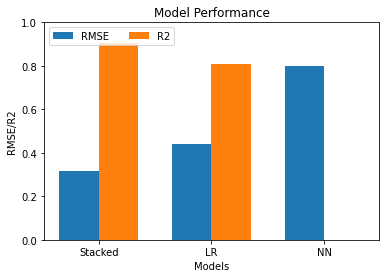

In [26]:
RMSE_Results = [rmse_stack, rmse_lr, rmse_nn]
R2_Results = [r2_stack, r2_lr, 0]

rg= np.arange(3)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label="RMSE")

# 2. Create bar plot with R2 results
plt.bar(rg+width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
labels = ['Stacked', 'LR', 'NN']
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
plt.xlabel("Models")
plt.ylabel("RMSE/R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [27]:
print("R2 for stacked model: ", r2_stack)
print("R2 for linear regression model: ", r2_lr)

R2 for stacked model:  0.9029915961065264
R2 for linear regression model:  0.8080490677710845
